In [280]:
#Team 7: We are working on data to analyze the stock market for some retails company's to check the performance of their stocks during the covid-19 pandemic (pre-vaccine vs post vaccine release).

#Questions:
#1. How did the stocks performs pre covid? (Jan - 2019 to  Dec -2019)
#2. How did the stocks performs during the pandemic before the vaccine release? Feb-2020 to Aug - 2021
#How did the stocks perform during the pandemic after the vaccine release? Sept-2021 to Sept-2022

In [281]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time
import yfinance as yf
import datetime as dt

In [282]:
import yfinance as yf

lowes=yf.Ticker("LOW")

print(lowes)

# get stock info
lowes.info

# get historical market data, here max is 5 years.
lowes.history(period="max")

yfinance.Ticker object <LOW>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,0.292091,0.284909,0.284909,217600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,0.287303,0.277726,0.277726,272000,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,0.280120,0.275332,0.277726,777600,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,0.282515,0.277726,0.277726,2105600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,0.280120,0.272938,0.272938,348800,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,183.570007,187.800003,181.039993,186.559998,2715300,0.0,0.0
2022-11-08 00:00:00-05:00,188.059998,190.009995,185.779999,188.360001,2880800,0.0,0.0
2022-11-09 00:00:00-05:00,187.309998,191.270004,186.309998,186.630005,3007200,0.0,0.0


In [283]:
# Convert the cities weather data into a Pandas DataFrame
lowes_data_df = pd.DataFrame(lowes.history(period="max"))

# Show Record Count
lowes_data_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,0.292091,0.284909,0.284909,217600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,0.287303,0.277726,0.277726,272000,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,0.280120,0.275332,0.277726,777600,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,0.282515,0.277726,0.277726,2105600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,0.280120,0.272938,0.272938,348800,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,183.570007,187.800003,181.039993,186.559998,2715300,0.0,0.0
2022-11-08 00:00:00-05:00,188.059998,190.009995,185.779999,188.360001,2880800,0.0,0.0
2022-11-09 00:00:00-05:00,187.309998,191.270004,186.309998,186.630005,3007200,0.0,0.0


In [284]:
lowes_data_df.reset_index(inplace=True)
lowes_data_df['index'] = lowes_data_df.index
lowes_data_df['Date'] = pd.to_datetime(lowes_data_df['Date'], format='%Y-%m-%d')
lowes_data_df = lowes_data_df[["Date","Close"]]
lowes_data_df

,Date,Close
0,1980-03-17 00:00:00-05:00,0.284909
1,1980-03-18 00:00:00-05:00,0.277726
2,1980-03-19 00:00:00-05:00,0.277726
3,1980-03-20 00:00:00-05:00,0.277726
4,1980-03-21 00:00:00-05:00,0.272938
...,...,...
10753,2022-11-07 00:00:00-05:00,186.559998
10754,2022-11-08 00:00:00-05:00,188.360001
10755,2022-11-09 00:00:00-05:00,186.630005
10756,2022-11-10 00:00:00-05:00,204.320007


In [285]:
# Export the City_Data into a csv
lowes_data_df.to_csv("lowes.csv")

In [286]:
lowes_data_df.dtypes

Date     datetime64[ns, America/New_York]
Close                             float64
dtype: object

In [287]:
#lowes_pre_covid_df = lowes_data_df.loc[((lowes_data_df['Date'].dt.year == 2019) & (lowes_data_df['Date'].dt.month == 1))]
#lowes_pre_covid_df



In [288]:
#Create a dataframe for lowes pre-covid stock data (Jan - 2019 to Dec -2019)
#lowes_pre_covid_df = lowes_data_df.loc[((lowes_data_df['Date'].dt.year == 2019))]
#lowes_pre_covid_dfTarget_pre_covid_df = Target_data_df.loc[((Target_data_df['Date'].dt.year == 2019))]
#Target_pre_covid_df.sort_values(by=['Date'])

lowes_pre_covid_df = lowes_pre_covid_df.loc[((lowes_pre_covid_df['Date'].dt.year == 2019))]
lowes_pre_covid_df.sort_values(by=['Date'])


,Date,Close
9783,2019-01-02 00:00:00-05:00,86.047890
9784,2019-01-03 00:00:00-05:00,85.022072
9785,2019-01-04 00:00:00-05:00,87.540016
9786,2019-01-07 00:00:00-05:00,89.199974
9787,2019-01-08 00:00:00-05:00,91.046425
...,...,...
10030,2019-12-24 00:00:00-05:00,113.905373
10031,2019-12-26 00:00:00-05:00,113.867340
10032,2019-12-27 00:00:00-05:00,114.342857
10033,2019-12-30 00:00:00-05:00,114.171677


In [289]:
#lowes_pre_covid_month = lowes_pre_covid_df.loc[((lowes_pre_covid_df['Date'].dt.month == 1))]
#lowes_pre_covid_month

#Create a dataframe for Target pre-covid stock data (Jan 2019 - Dec 2019) By Month
monthly_close_pre_covid_df = pd.DataFrame(lowes_pre_covid_df.groupby(lowes_pre_covid_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_pre_covid_df['Store'] = 'Lowes'
monthly_close_pre_covid_df['Timeframe'] = 'Pre-Covid'

monthly_close_pre_covid_df

,Month,Close,Store,Timeframe
0,1,88.150024,Lowes,Pre-Covid
1,2,95.365173,Lowes,Pre-Covid
2,3,97.004629,Lowes,Pre-Covid
3,4,106.829592,Lowes,Pre-Covid
4,5,97.962672,Lowes,Pre-Covid
5,6,92.448915,Lowes,Pre-Covid
6,7,97.950392,Lowes,Pre-Covid
7,8,95.733544,Lowes,Pre-Covid
8,9,106.231023,Lowes,Pre-Covid
9,10,104.403744,Lowes,Pre-Covid


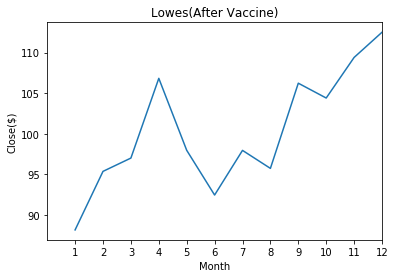

In [290]:
x = monthly_close_pre_covid_df['Month']
y = monthly_close_pre_covid_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Lowes(After Vaccine)");

In [291]:
#2. How did the stocks performs during the pandemic before the vaccine release? (Jan 2020 - Nov 2020)

#Dateframe Before Vaccine(Jan 2020 - Nov 2020)
lowes_before_vaccine_df = lowes_data_df.loc[((lowes_data_df['Date'] >= '2020-01-01') & (lowes_data_df['Date'] < '2020-12-01'))]
lowes_before_vaccine_df.sort_values(by=['Date'])

,Date,Close
10035,2020-01-02 00:00:00-05:00,114.561592
10036,2020-01-03 00:00:00-05:00,113.743706
10037,2020-01-06 00:00:00-05:00,114.456970
10038,2020-01-07 00:00:00-05:00,113.772240
10039,2020-01-08 00:00:00-05:00,115.579201
...,...,...
10261,2020-11-23 00:00:00-05:00,148.734329
10262,2020-11-24 00:00:00-05:00,149.982925
10263,2020-11-25 00:00:00-05:00,149.905472
10264,2020-11-27 00:00:00-05:00,149.702209


In [292]:
#Create a dataframe for Lowes before Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_before_vaccine_df = pd.DataFrame(lowes_before_vaccine_df.groupby(lowes_before_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_before_vaccine_df['Store'] = 'Lowes'
monthly_close_before_vaccine_df['Timeframe'] = 'Before Vaccine'

monthly_close_before_vaccine_df

,Month,Close,Store,Timeframe
0,1,114.796645,Lowes,Before Vaccine
1,2,115.070819,Lowes,Before Vaccine
2,3,84.929568,Lowes,Before Vaccine
3,4,90.547315,Lowes,Before Vaccine
4,5,111.487031,Lowes,Before Vaccine
5,6,126.162311,Lowes,Before Vaccine
6,7,136.960829,Lowes,Before Vaccine
7,8,152.574953,Lowes,Before Vaccine
8,9,156.297718,Lowes,Before Vaccine
9,10,164.156581,Lowes,Before Vaccine


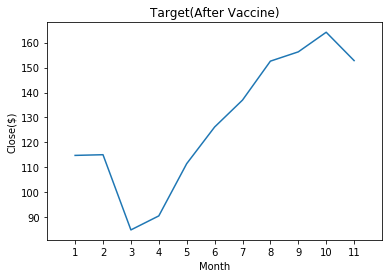

In [294]:
x = monthly_close_before_vaccine_df['Month']
y = monthly_close_before_vaccine_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Target(After Vaccine)");

In [295]:
#Dateframe After Vaccine(Dec 2020 - Dec 2021)
lowes_after_vaccine_df = lowes_data_df.loc[((lowes_data_df['Date'] > '2020-11-30') & (lowes_data_df['Date'] <= '2021-12-31'))]
lowes_after_vaccine_df.sort_values(by=['Date'])

,Date,Close
10266,2020-12-01 00:00:00-05:00,148.472992
10267,2020-12-02 00:00:00-05:00,146.934082
10268,2020-12-03 00:00:00-05:00,147.088928
10269,2020-12-04 00:00:00-05:00,145.182220
10270,2020-12-07 00:00:00-05:00,147.108307
...,...,...
10535,2021-12-27 00:00:00-05:00,249.069046
10536,2021-12-28 00:00:00-05:00,249.383224
10537,2021-12-29 00:00:00-05:00,252.868423
10538,2021-12-30 00:00:00-05:00,251.709976


In [296]:
#3. How did the stocks perform during the pandemic after the vaccine release? Jan 2020 - Nov 2020
#Create a dataframe for Lowes After Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_after_vaccine_df = pd.DataFrame(lowes_after_vaccine_df.groupby(lowes_after_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_after_vaccine_df['Store'] = 'Lowes'
monthly_close_after_vaccine_df['Timeframe'] = 'After Vaccine'

monthly_close_after_vaccine_df

,Month,Close,Store,Timeframe
0,1,163.419687,Lowes,After Vaccine
1,2,166.780481,Lowes,After Vaccine
2,3,169.011627,Lowes,After Vaccine
3,4,193.681316,Lowes,After Vaccine
4,5,192.620157,Lowes,After Vaccine
5,6,185.515788,Lowes,After Vaccine
6,7,190.273588,Lowes,After Vaccine
7,8,192.649813,Lowes,After Vaccine
8,9,201.593032,Lowes,After Vaccine
9,10,213.830129,Lowes,After Vaccine


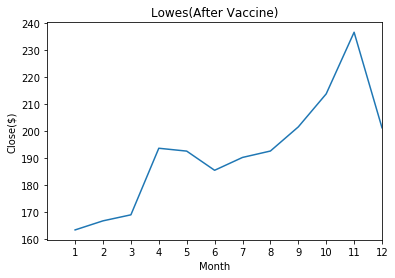

In [297]:
x = monthly_close_after_vaccine_df['Month']
y = monthly_close_after_vaccine_df['Close']
plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Lowes(After Vaccine)");

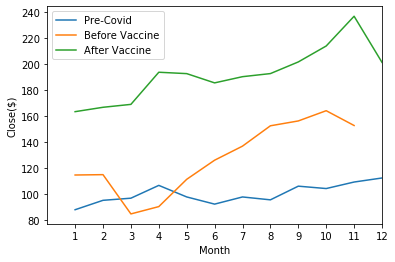

In [298]:
frames = [monthly_close_pre_covid_df, monthly_close_before_vaccine_df, monthly_close_after_vaccine_df]

lowes_FINAL_df = pd.concat(frames)

fig,ax = plt.subplots()

for timeframe in ['Pre-Covid', 'Before Vaccine', 'After Vaccine']:
    ax.plot(lowes_FINAL_df[lowes_FINAL_df.Timeframe==timeframe].Month,lowes_FINAL_df[lowes_FINAL_df.Timeframe==timeframe].Close,label=timeframe)

plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")

ax.legend(loc='best')